# Wstęp do Sztucznej Inteligencji - rok akademicki 2018/2019

Przed rozpoczęciem pracy z notatnikiem zmień jego nazwę zgodnie z wzorem: `{NrAlbumu}_{Nazwisko}_{Imie}_{PoprzedniaNazwa}`.

Przed wysłaniem notatnika upewnij się, że rozwiązałeś wszystkie zadania/ćwiczenia, w szczególności, że uzupełniłeś wszystkie pola `YOUR CODE HERE` oraz `YOUR ANSWER HERE`.

## Temat: Algorytmy genetyczne - Lab 3 - Zadania (obowiązkowe)
Zapoznaj się z treścią niniejszego notatnika czytając i wykonując go komórka po komórce. Wykonaj napotkane zadania/ćwiczenia.

## Zadanie 1 (1pkt.)

Zgodnie z instrukcjami prowadzącego, wybierz funkcję testową ze strony: https://www.sfu.ca/~ssurjano/optimization.html z działu "Many Local Minima" (z wyjątkiem funkcji nr 6).

Zaplementuj ją jako funkcję w Pythonie.

Dla wszystkich funkcji przyjmujemy `N=2` tzn. rozważamy ją jako funkcję dwóch zmiennych $f(x_1, x_2)$.

In [1]:
125689%16+1

10

In [2]:
import math
import numpy as np

# testowa funkcja celu
# x - jednowymiarowa tablica ndarray
def obj_func(x):
    w1 = 1 + (x[0]-1)/4
    w2 = 1 + (x[1] - 1) / 4

    sum = (w1 - 1)**2 * (1 + 10 * math.sin(math.pi * w1 + 1)**2)

    return math.sin(math.pi * w1)**2 + sum + (w2 - 1)**2 * (1 + math.sin(2 * math.pi * w2)**2)

## Zadanie 2 (1pkt.)

Przygotuj wykres 3D funkcji zaimplementowanej w zadaniu nr 1.

<IPython.core.display.Javascript object>


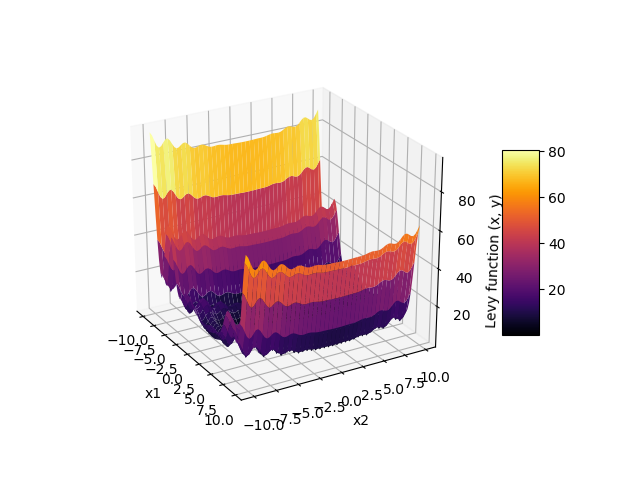

In [20]:
%matplotlib notebook
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.arange(-10, 10, 0.25)
y = np.arange(-10, 10, 0.25)
x, y = np.meshgrid(x, y)
z = np.array([obj_func([x_z, y_z]) for x_z, y_z in zip(np.ravel(x), np.ravel(y))])
z = z.reshape(x.shape)
surf = ax.plot_surface(x, y, z, cmap='inferno', linewidth=0)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Levy function (x, y)')

fig.colorbar(surf, shrink=0.5, aspect=5)


plt.show()

## Zadanie 3 (2pkt.)

Korzystając z funkcji zaimplementowanych na poprzednich zajęciach, zaimplementuj główną pętlę klasycznego algorytmu genetyczengo.
![pag_schemat.png](http://torus.uck.pk.edu.pl/~amarsz/images/pag_schemat.png)

Implementacja powinna mieć postać funkcji, która przyjmuje parametry:

- `fun` - funkcja, której maksimum ma zostać znalezione
- `pop_size` - rozmiar populacji
- `pk` - prawdopodobieństwo krzyżowania
- `pm` - prawdopodobieństwo mutacji
- `generations` - liczba pokoleń 
- `dx` - dokładność kodowania

Funkcja powinna zwracać:
- `best_sol` - najlepsze znalezione rozwiązanie (nieważne, w której iteracji; UWAGA! niekoniecznie jest to najlepszy osobnik z ostatniej populacji)
- `best_generation` - numer pokolenia, z którego pochodzi najlepsze rozwiązanie
- `list_best` - lista z najlepszą oceną osobnika w każdym pokoleniu (najlepsza ocena znaleziona w danym pokoleniu lub wcześniej)
- `list_best_generation` - lista z najlepszymi ocenami w każdym pokoleniu (najlepsza ocena z danej populacji)
- `list_mean` - lista z wartościami średnimi ocen osobników z każdego pokolenia

In [ ]:
import math
import numpy as np


def nbits(a, b, dx):
    length = abs(b - a)/dx
    B = math.ceil(math.log(length, 2))

    tmp = 2**B
    dx_new = abs(b-a)/tmp

    return B, dx_new


def gen_population(P, N, B):
    population = np.ndarray(shape=(N, P * B), dtype="int")
    for i in range(P):
        for j in range(B * N):
            population[i][j] = np.random.randint(0, 2)


    return population


def decode_individual(individual, N, B, a, dx):
    decoded = np.ndarray(shape=(N,))

    for i in range(N):
        decimal = 0
        for j in range(B):
            decimal += individual[i * B + j] * 2**(B - j - 1)
        decoded[i] = a + (decimal * dx)
    return decoded


def evaluate_population(func, pop, N, B, a, dx):
    evaluated_pop = np.array([func(decode_individual(i, N, B, a, dx)) for i in pop])
    return evaluated_pop

def get_best(pop, evaluated_pop):
    best_value = np.amax(evaluated_pop)
    best_individual = np.array(pop[np.argmax(evaluated_pop)])
    return best_individual, best_value


def roulette(pop, evaluated_pop):
    if evaluated_pop.min() < 1:
        evaluated_pop += math.fabs(evaluated_pop.min()) + 1

    evaluated_pop = np.cumsum(evaluated_pop / evaluated_pop.sum())
    new_pop = np.ndarray(shape=np.shape(pop), dtype=np.float64)

    for i in range(len(pop)):
        j = 0
        r = np.random.random_sample()
        while evaluated_pop[j] < r:
            j += 1
        new_pop[i] = pop[j]

    return new_pop


def cross(pop, pk):
    new_pop = np.ndarray(shape=(len(pop), len(pop[0])), dtype="int")
    for i in range(0, len(pop) - 1, 2):
        if np.random.random() < pk:
            cross_p = len(pop[0]/2)
            for j in range(cross_p):
                new_pop[i][j] = pop[i][j]
                new_pop[i + 1][j] = pop[i + 1][j]
            for k in range(cross_p, len(pop[0])):
                new_pop[i][j] = pop[i + 1][j]
                new_pop[i + 1][j] = pop[i][j]
        else:
            new_pop[i] = pop[i]
            new_pop[i + 1] = pop[i + 1]
        if len(pop) % 2 == 1:
            new_pop[len(pop) - 1] = pop[len(pop) - 1]
    return new_pop


def mutate(pop, pm):
    new_pop = np.array([[not (x) if np.random.random_sample() < pm else x for x in pop[i]] for i in range(len(pop))])
    return new_pop

def obj_func(x):
    w1 = 1 + (x[0]-1)/4
    w2 = 1 + (x[1] - 1) / 4

    sum = (w1 - 1)**2 * (1 + 10 * math.sin(math.pi * w1 + 1)**2)


## Zadnie 4 (1pkt.)

Zaprezentuj działanie algorytmu z przykładowymi wartościami parametrów:

- `pop_size`: 60
- `pk`: 0.7
- `pm`: 0.01
- `generations`: 200
- `dx`: 1e-10

Na wykresach funkcji 3D przedstaw położenie osobników z pierwszej populacji, w połowie ewolucji oraz końcowej populacji. Zaznacz wyraźnie położenie najlepszeg rozwiązania.

Na wykresach 2D przedstaw przebieg wartości z list z zebranymi statystykami (listy `list_best`, `list_best_generation`, `list_mean`) w zależności od numeru pokolenia. 

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Zadanie 5 (5pkt.)

Zbadaj wpływ parametrów klasycznego algorytmu genetycznego na jego zdolność znalezienia optymalnego rozwiązania. Dla ułatwienia analizy, zmieniając jeden parametr, zachowaj typowe wartości pozostałych.

1. Jak działa algorytm z typowymi ustawieniami parametrów (jak w zadaniu 4)? Podaj średnią wartość przystosowania znalezionego rozwiązania po wielokrotnym uruchomieniu AG.
2. Czy wydłużenie ewolucji przynosi poprawę czy też następuje "nasycenie"? Porównaj zarówno jak dobre rozwiązanie zostało znalezione jak również w której generacji.
    - `generations`: kilka różnych wartości z przedziału [100, 10000]
3. Czy mutacja jest potrzebna? 
    - `pm` = 0.0
4. Jak działa algorytm bez krzyżowania, z samą mutacją? 
    - `pk` = 0.0
5. Czy lepiej jest dłużej ewoluować mniejszą populację czy krócej większą, jeśli liczba ewaluacji funkcji jest taka sama (np. 2000)?
    - porównaj dwa ustawienia: `pop_size`=20, `generations`=100  vs. `pop_size`=100, `generations`=20.

UWAGA: Powyższe porównania powinny być wykonane na podstawie uśrednionych wyników co najmniej 10 uruchomień algorytmu z danymi parametrami. Podając wyniki podaj średnią z najlepszych znalezionych rozwiązań oraz odchylenie standardowe oraz numer pokolenia, w którym znaleziono rozwiązanie.

In [ ]:
# Miejsce na twój kod

#przygotuj wartości parametrów AG
exec_num = 10 # lub więcej

for i in range(exec_num):
    #uruchom AG
    #zapamiętaj wyniki

#wylicz średnią i odchylenie standardowe

UMIEŚĆ TWOJE WNIOSKI I KOMENTARZE W KOMÓRCE PONIŻEJ

Odnieś się do każdego punktu.

YOUR ANSWER HERE

<div style="text-align: right">&copy; Zakład Inteligencji Obliczeniowej, Instytut Informatyki, Politechnika Krakowska </div>